### NLP Thesis Features Important

In [1]:
import pandas as pd 
import re
import string

#### Data Facts and Import 

In [2]:
df_train = pd.read_csv("D:/Thesis/Thesis-II/XNLP-Thesis/src/ELI5 Code Incorporate/Dataset\HotelReviews/train.csv")

In [3]:
df_train.shape

(38932, 5)

In [4]:
df_train.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   User_ID       38932 non-null  object
 1   Description   38932 non-null  object
 2   Browser_Used  38932 non-null  object
 3   Device_Used   38932 non-null  object
 4   Is_Response   38932 non-null  object
dtypes: object(5)
memory usage: 1.5+ MB


In [6]:
df_train.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id10326,1
Description,38932,38932,The room was kind of clean but had a VERY stro...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


## Data Cleaning / EDA

In [7]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = df_train.isnull().sum().sort_values(ascending=False)
percentage = ((df_train.isnull().sum()/len(df_train)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1,
keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
User_ID,0,0.0
Description,0,0.0
Browser_Used,0,0.0
Device_Used,0,0.0
Is_Response,0,0.0


Percentage for default

happy        68.12
not happy    31.88
Name: Is_Response, dtype: float64


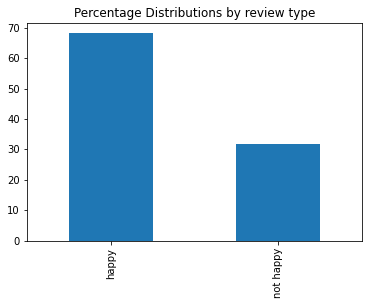

In [8]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline
print('Percentage for default\n')
print(round(df_train.Is_Response.value_counts(normalize=True)*100,2))
round(df_train.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review type')
plt.show()

In [9]:
#Removing columns
df_train.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [10]:
#This function converts to lower-case, removes square bracket, removes numbers and punctuation
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [11]:
# Apply first level cleaning

# Let's take a look at the updated text
df_train['cleaned_description'] = pd.DataFrame(df_train.Description.apply(cleaned1))
df_train.head(10)

,Description,Is_Response,cleaned_description
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...


In [12]:
# Apply a second round of cleaning
def text_clean_2(text):
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

cleaned2 = lambda x: text_clean_2(x)

In [13]:
# Let's take a look at the updated text
df_train['cleaned_description_new'] = pd.DataFrame(df_train['cleaned_description'].apply(cleaned2))
df_train.head(10)

,Description,Is_Response,cleaned_description,cleaned_description_new
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...,my girlfriends and i stayed here to celebrate ...
5,We had - rooms. One was very nice and clearly ...,happy,we had rooms one was very nice and clearly ha...,we had rooms one was very nice and clearly ha...
6,My husband and I have stayed in this hotel a f...,not happy,my husband and i have stayed in this hotel a f...,my husband and i have stayed in this hotel a f...
7,My wife & I stayed in this glorious city a whi...,happy,my wife i stayed in this glorious city a whil...,my wife i stayed in this glorious city a whil...
8,My boyfriend and I stayed at the Fairmont on a...,happy,my boyfriend and i stayed at the fairmont on a...,my boyfriend and i stayed at the fairmont on a...
9,"Wonderful staff, great location, but it was de...",not happy,wonderful staff great location but it was defi...,wonderful staff great location but it was defi...


## Model training 

In [14]:
from sklearn.model_selection import train_test_split

Independent_var = df_train.cleaned_description_new
Dependent_var = df_train.Is_Response

IV_train, IV_test, DV_train, DV_test = train_test_split(Independent_var, Dependent_var, test_size = 0.1, random_state = 225)

print('IV_train :', len(IV_train))
print('IV_test  :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test  :', len(DV_test))


IV_train : 35038
IV_test  : 3894
DV_train : 35038
DV_test  : 3894


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


In [16]:
model = Pipeline([('vectorizer',tvec),('classifier',clf2)])

model.fit(IV_train, DV_train)

predictions = model.predict(IV_test)

confusion_matrix(predictions, DV_test)

c:\Users\asif.raza\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2421,  297],
       [ 150, 1026]], dtype=int64)

In [17]:
IV_test.iloc(0)

## Model prediciton 

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Precision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8852080123266564
Precision :  0.8914801157152283
Recall :  0.8852080123266564


## Trying on new reviews 

In [19]:
example = ["I'm not happy"]
result = model.predict(example)

print(result)

['happy']


In [20]:
!pip install tabulate
!pip install jinja2==3.0.3
!pip install scikit-learn scipy matplotlib


!pip install sklearn
import sklearn


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.



  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2


Apply ELI5 

In [21]:
!#pip install --upgrade jinja2>=3.0
#!pip install attr



#!pip uninstall attr
#!pip install attrs

'#pip' is not recognized as an internal or external command,
operable program or batch file.


In [22]:
#pip uninstall attr


In [23]:
#pip uninstall attrs


In [24]:
#pip install attrs

In [36]:
!pip3 install --upgrade aiohttp_jinja2

!pip3 install --upgrade jinja2>=3.1.1

In [26]:
!pip install graphviz
#python version on 3.9




In [30]:
#pip install Jinja2==3.1.1

#pip install jinja2==3.0.3

  Using cached Jinja2-3.0.3-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.2
    Uninstalling Jinja2-3.1.2:
      Successfully uninstalled Jinja2-3.1.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not installed.
jupyter-server 1.13.5 requires pywinpty<2; os_name == "nt", but you have pywinpty 2.0.2 which is incompatible.


In [37]:
# from jinja2.utils import pass_context 
import eli5
from eli5 import explain_weights, explain_prediction
from eli5.formatters import format_as_html, format_as_text, format_html_styles, fields

# print(format_as_text(explain_weights(clf, vec, target_names=train['target_names'])))

AttributeError: module 'jinja2.ext' has no attribute 'with_'

In [ ]:
from IPython.core.display import display, HTML
show_html = lambda html: display(HTML(html))
show_html_expl = lambda expl, **kwargs: show_html(format_as_html(expl, include_styles=False, **kwargs))
show_html(format_html_styles())

C:\Users\asif.raza\AppData\Local\Temp\ipykernel_18068\3181709785.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


NameError: name 'format_html_styles' is not defined

In [ ]:
eli5.show_weights(clf2, vec=tvec, target_names=df_train['Is_Response'], horizontal_layout=False)

NameError: name 'eli5' is not defined

In [ ]:
show_html_expl(
    explain_prediction(clf2, str("i'm very happy due to raining"), tvec, target_names=df_train['Is_Response']),
    force_weights=False, horizontal_layout=True)

NameError: name 'explain_prediction' is not defined